In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt,tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df= pd.read_csv('/content/sample_data/california_housing_test.csv')
df = data.dropna()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [5]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

In [6]:
X = df.drop("median_house_value", axis=1)
y = np.log1p(df["median_house_value"])  # log-transform target

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # regression output
])


In [10]:
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

early_stop = tf.keras.callbacks.EarlyStopping(patience=20, # stop if val_loss doesn’t improve for 20 epochs
    restore_best_weights=True
)

history = model.fit( x_train_scaled, y_train,validation_data=(x_test_scaled, y_test),epochs=300,callbacks=[early_stop],verbose=0
)

In [11]:
y_pred_log = model.predict(x_test_scaled)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

from sklearn.metrics import r2_score, mean_absolute_error
print("R²:", r2_score(y_true, y_pred))
print("MAE:", mean_absolute_error(y_true, y_pred))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R²: 0.6663106062447663
MAE: 41974.14729817707


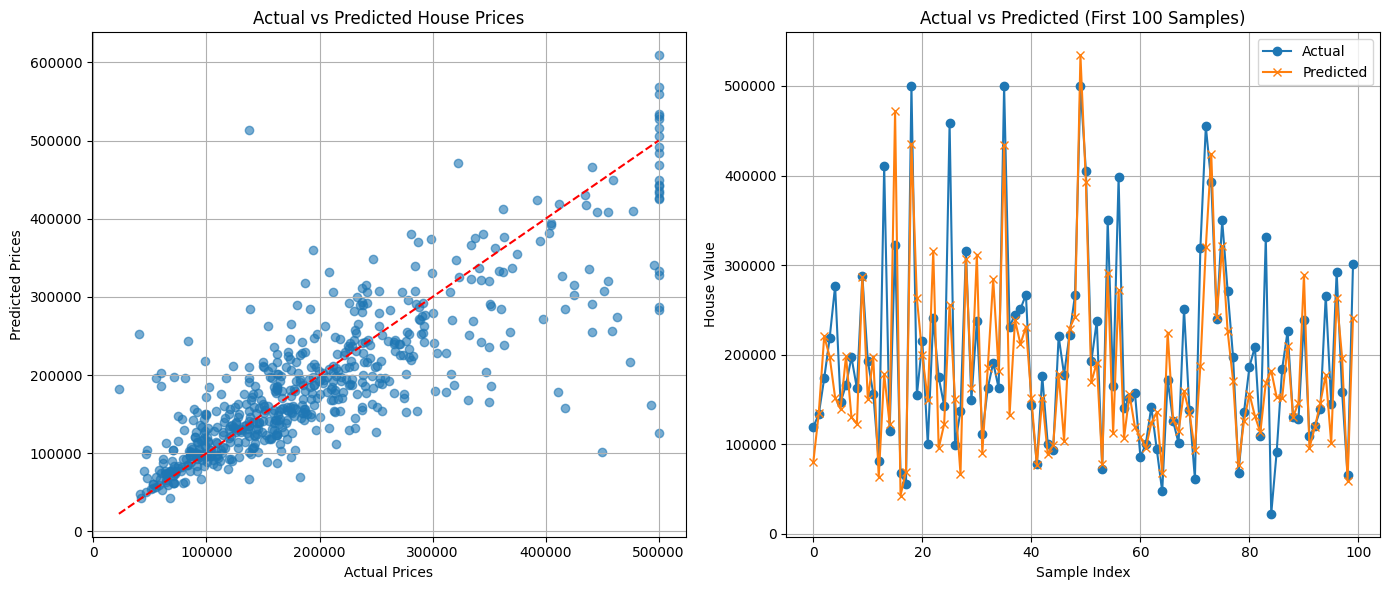

In [12]:
plt.figure(figsize=(14,6))

# Left plot: scatter
plt.subplot(1,2,1)
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)

# Right plot: trend
plt.subplot(1,2,2)
plt.plot(y_true.values[:100], label="Actual", marker='o')
plt.plot(y_pred[:100], label="Predicted", marker='x')
plt.title("Actual vs Predicted (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("House Value")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()